<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/BankMajorProjectSemiCompleted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [104]:
df=pd.read_csv("/content/bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
 <Axes: >)

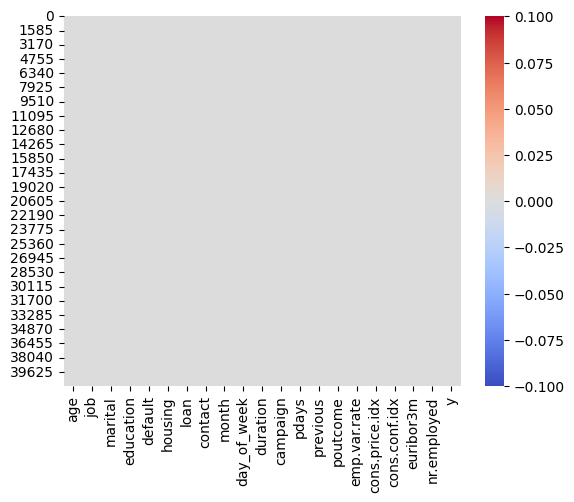

In [105]:
df.isna().sum(),sns.heatmap(df.isna(),cmap="coolwarm")

In [106]:
df.duplicated().sum()

12

In [107]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [108]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [109]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [110]:
columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]
for i in columns:
    unique_values = df[i].unique()
    print(f" '{i}': {unique_values}")


 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
 'marital': ['married' 'single' 'divorced' 'unknown']
 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
 'default': ['no' 'unknown' 'yes']
 'housing': ['no' 'yes' 'unknown']
 'loan': ['no' 'yes' 'unknown']
 'contact': ['telephone' 'cellular']
 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
 'poutcome': ['nonexistent' 'failure' 'success']
 'y': ['no' 'yes']


In [111]:
df1=pd.get_dummies(df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]],drop_first=True)
df1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [112]:
dfe=pd.concat([df,df1],axis=1)
dfe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0


In [113]:
dfe=dfe.drop(["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"],axis=1)
dfe

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [114]:
dfe.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown 

In [115]:
dfe.isna().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

In [116]:
dfe.duplicated().sum()

12

In [117]:
dfe.drop_duplicates()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [132]:
dfe.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [136]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the DataFrame 'df' with the columns mentioned after one-hot encoding
columns_to_keep = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
                   'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services',
                   'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
                   'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y',
                   'education_high.school', 'education_illiterate', 'education_professional.course',
                   'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes',
                   'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
                   'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                   'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
                   'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']

# Select the relevant columns for PCA
df_pca_input = dfe[columns_to_keep]

# Separate the target variable 'y'
X = df_pca_input.drop('y', axis=1)
y = df_pca_input['y']

# Standardize the input features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with desired number of components (e.g., n_components=2 for 2D visualization)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA-transformed features and target variable
df_pca_result = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca_result['y'] = y.values

# Now you can use 'df_pca_result' for classification or visualization tasks with the reduced feature set.


In [137]:
x=df_pca_result.drop(["y"],axis=1).values
x

array([[-1.56698373,  1.85515674],
       [-1.77234288,  1.8715822 ],
       [-1.40875629,  0.64855721],
       ...,
       [ 1.90309602,  1.08326009],
       [ 1.4792685 , -0.26048633],
       [ 3.27129447,  2.46202509]])

In [138]:
y=df_pca_result["y"].values
y

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((28831, 2), (12357, 2))

In [141]:
y_train.shape,y_test.shape

((28831,), (12357,))

In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [143]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred

array(['yes', 'yes', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [145]:
df_pca_result.columns

Index(['PC1', 'PC2', 'y'], dtype='object')

In [146]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8400906368859755
              precision    recall  f1-score   support

          no       0.91      0.91      0.91     10968
         yes       0.29      0.29      0.29      1389

    accuracy                           0.84     12357
   macro avg       0.60      0.60      0.60     12357
weighted avg       0.84      0.84      0.84     12357



[[9976  992]
 [ 984  405]]


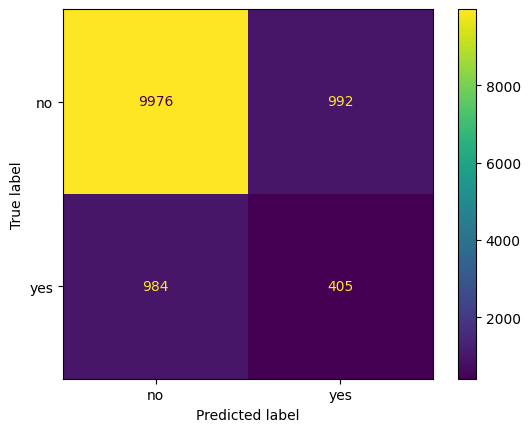

In [147]:
result=confusion_matrix(y_test,y_pred)
print(result)
labels=["no","yes"]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [158]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifierClassifier
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
clf.fit(x_train,y_train)
# print(clf.best_params_)


ImportError: ignored